#Methodology
####1. Data Preprocessing
* **Normalisation:** Scale numerical characteristics like temperature and humidity for standardised analysis.
* **Data Cleaning:** Address missing values, fix inconsistencies, and guarantee data quality.
* **Feature Engineering:** Construct new features, such seasonal trends or fire danger indices, from the data that already exists.
---
#### 2. A Strategy for Data Integration

* **Schema Mapping:** Prepare data formats appropriate for analysis, guaranteeing interoperability across datasets.
* **Data Transformation:** Align data from many sources (e.g., meteorological stations, geographic coordinates) into a consistent schema.
* **Data Reconciliation:** Clear out ambiguities and guarantee data coherence for precise analysis.

---
####3. Mapreduce on Hadoop

---
 #### 4. Implementation of Apache Spark

* **Make use of Apache Spark** to improve data processing power:

* Process and examine the dataset with **DataFrames**

* Utilise machine learning techniques to forecast the likelihood of a fire by analysing past data and climatic variables.

---
####5.  Visualisation

Show off the conclusions drawn from the dataset:
To show patterns in the occurrence of fires, make time series charts or geographic heatmaps.
Use interactive visualisations to present findings so that stakeholders may better comprehend them and make decisions.
####6. Evaluation, Analysis & Illustration

* Assess how well integrated data works:

>> To find trends, seasonal patterns, and spatial relationships, do exploratory data analysis.


---

#### 5. Illustration





#Importing relevant libraries

In [32]:
!pip install pyspark
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from pyspark.sql import SparkSession
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler





#Data Preprocessing

## Data Cleaning



In [33]:
#loading the dataset and checking for null values
df = pd.read_csv('forestfires.csv')
df = df.round(1)

print(df.head())
print(df.isnull().sum())

   X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0
X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64


In [34]:
#handling missing values if needed

df['temp'].fillna(df['temp'].median(), inplace=True)
df['RH'].fillna(df['RH'].median(), inplace=True)
df['wind'].fillna(df['wind'].median(), inplace=True)
df['rain'].fillna(df['rain'].median(), inplace=True)
df['area'].fillna(0, inplace=True)

In [35]:
#checking for consistencies of data types
print(df.dtypes)

X          int64
Y          int64
month     object
day       object
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object


In [36]:
#converting necessary columns tou 'category' type
df['month'] = pd.Categorical(df['month'], categories=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
df['day'] = pd.Categorical(df['day'], categories=['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun'])

In [37]:
# Removing duplicates
df.drop_duplicates(inplace=True)

In [38]:
#final data cleaning check
df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000
mean,4.678363,4.300195,90.637427,110.989279,549.155166,9.023587,18.887524,44.348928,4.010526,0.021832,12.891618
std,2.320059,1.230925,5.540920,64.191013,247.724594,4.575543,5.828128,16.358803,1.796613,0.297107,63.891841
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,440.900000,6.400000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.500000,8.400000,19.300000,42.000000,4.000000,0.000000,0.500000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,11.000000,22.800000,53.000000,4.900000,0.000000,6.600000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.800000


These steps ensure that the dataset checks for and handles missing values if necessary, converts data types for consistency, and removes potential duplicates. While this structured approach is necessary, the dataset turned out to be well put-together and cleaner, than expected.

##Normalization



In [39]:
#normalizing necessary data  using MinMaxScaler
columns_to_normalize = ['temp', 'RH', 'wind', 'rain', 'area']
scaler = MinMaxScaler()
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])
print(df.head())


   X  Y month  day  FFMC   DMC     DC  ISI      temp        RH      wind  \
0  7  5   mar  fri  86.2  26.2   94.3  5.1  0.192926  0.423529  0.700000   
1  7  4   oct  tue  90.6  35.4  669.1  6.7  0.508039  0.211765  0.055556   
2  7  4   oct  sat  90.6  43.7  686.9  6.7  0.398714  0.211765  0.100000   
3  8  6   mar  fri  91.7  33.3   77.5  9.0  0.196141  0.964706  0.400000   
4  8  6   mar  sun  89.3  51.3  102.2  9.6  0.295820  0.988235  0.155556   

      rain  area  
0  0.00000   0.0  
1  0.00000   0.0  
2  0.00000   0.0  
3  0.03125   0.0  
4  0.00000   0.0  


In this normalized dataset:

* Numerical columns like 'temp', 'RH', 'wind', 'rain', and 'area' have been scaled to a range between 0 and 1.
* This scaling ensures that all numerical features are on a comparable scale, which is beneficial for various machine learning algorithms and statistical analyses.
* You can proceed with further analysis or modeling using this normalized dataset in your project. If you have any more questions or need additional assistance, feel free to ask!

## Feature Engineering

In [40]:
#extracting numberical month and day of week
df['month_num'] = df['month'].cat.codes + 1
df['day_num'] = df['day'].cat.codes + 1

In [41]:
#adding seasonal features
def get_season(month):
    if month in [12, 1, 2]:
        return 'winter'
    elif month in [3, 4, 5]:
        return 'spring'
    elif month in [6, 7, 8]:
        return 'summer'
    else:
        return 'fall'
df['season'] = df['month_num'].apply(get_season)

In [42]:
#Engineering Fire Danger Index (FDI)
df['FDI'] = (df['FFMC'] * df['DMC'] * df['DC']) / (10 * df['ISI'])

In [43]:
#Temperature and wind interactiveness
df['temp_wind_interaction'] = df['temp'] * df['wind']

In [44]:
# Log transforming 'area' to log to handle skewness
df['log_area'] = df['area'].apply(lambda x: np.log(x + 1))

In [45]:
#saving processed datased as a new csv file
df.to_csv('processed_forestfires.csv', index=False)
print("Processed dataset saved successfully.")

Processed dataset saved successfully.


In [46]:
#opening and checking the processed dataset
df_processed = pd.read_csv('processed_forestfires.csv')
print(df_processed.head())
print(df_processed.describe())

   X  Y month  day  FFMC   DMC     DC  ISI      temp        RH      wind  \
0  7  5   mar  fri  86.2  26.2   94.3  5.1  0.192926  0.423529  0.700000   
1  7  4   oct  tue  90.6  35.4  669.1  6.7  0.508039  0.211765  0.055556   
2  7  4   oct  sat  90.6  43.7  686.9  6.7  0.398714  0.211765  0.100000   
3  8  6   mar  fri  91.7  33.3   77.5  9.0  0.196141  0.964706  0.400000   
4  8  6   mar  sun  89.3  51.3  102.2  9.6  0.295820  0.988235  0.155556   

      rain  area  month_num  day_num  season           FDI  \
0  0.00000   0.0          3        5  spring   4175.899843   
1  0.00000   0.0         10        2    fall  32029.317672   
2  0.00000   0.0         10        6    fall  40590.868925   
3  0.03125   0.0          3        5  spring   2629.497500   
4  0.00000   0.0          3        7  spring   4876.952062   

   temp_wind_interaction  log_area  
0               0.135048       0.0  
1               0.028224       0.0  
2               0.039871       0.0  
3               0.0784

## Overall Summary

1. Inidividual Data Rows
The first tables presents the data as a whole, displaying the first number of rows. We can observe important information such as Fire Weather Index(FWI) components,recorded temperature, wind, precipitation. This is a preview of our cleaned dataset.

2. Descriptive Statistics

The second table gives us more insight about data, which is more technical and numerical, each having their own thresholds and measuring scales. For instance, trends of high FFMC, relatively high DC values, and other values show that these regions are not rainy and have low moisture, thus being much more prone to fires.

3. Data Rundown

This table serves to provide a more detailed view of the dataset thanks to our previous feature engineering. We can derive interesting facts, such as mean temperature levels(18.89C), RH percentages, mean wind speed(4.01), as well as an average of the area affed by the fires(12.89h), clearly showing that the majority of data are notable outliers.


#Data Integration Strategy

##Schema Mapping

Schema mapping ensures consistency in column names and types. Since we have a single dataset, this step is not necessary but still could be a good addition if a new dataset needs to be added.



In [47]:
#loading processed dataset
df = pd.read_csv('processed_forestfires.csv')

In [48]:
#reviewing current column names
print("Original Columns:", df.columns)

Original Columns: Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area', 'month_num', 'day_num', 'season', 'FDI',
       'temp_wind_interaction', 'log_area'],
      dtype='object')


In [49]:
# Confirm updated column names
print("Updated Columns:", df.columns)

Updated Columns: Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area', 'month_num', 'day_num', 'season', 'FDI',
       'temp_wind_interaction', 'log_area'],
      dtype='object')


##Data Transformation

Data transformation si a great way to prepare a dataset for analysis by clustering data with the use of the aggregating pandas feature. I have chosen to agg. the data by season in order to attempt identifying new patterns.




In [50]:
#Clustering data by season
seasonal_agg = df.groupby('season').agg({
    'temp': 'mean',
    'RH': 'mean',
    'wind': 'mean',
    'rain': 'sum',
    'area': 'sum'
}).reset_index()

In [51]:
#Now printing new results
print("Seasonal Aggregated Data:")
print(seasonal_agg.head())

Seasonal Aggregated Data:
   season      temp        RH      wind     rain      area
0    fall  0.552080  0.321777  0.350532  0.00000  2.920517
1  spring  0.344855  0.317831  0.501215  0.03125  0.298130
2  summer  0.625010  0.358670  0.403333  1.71875  2.619270
3  winter  0.182243  0.445161  0.485663  0.00000  0.224972


##Data Reconciliation

Reconciling data assures us that data is consistent and all discrepancies are resolved. We can do that by checking for outliers in different columns, such as area here.




In [52]:
#Checking for outliers in 'area' column
outliers = df[df['area'] > df['area'].quantile(.95)]

In [53]:
# Display outliers
print("Outliers in 'area' column:")
print(outliers.head())

Outliers in 'area' column:
     X  Y month  day  FFMC    DMC     DC   ISI      temp        RH      wind  \
223  7  5   oct  mon  91.7   48.5  696.1  11.1  0.446945  0.341176  0.400000   
224  8  6   aug  sat  92.2   81.8  480.8  11.9  0.575563  0.223529  0.455556   
225  4  6   sep  sun  93.5  149.3  728.6   8.1  0.839228  0.129412  0.300000   
226  8  6   aug  sat  92.2   81.8  480.8  11.9  0.456592  0.329412  0.400000   
227  4  4   sep  wed  92.9  133.3  699.6   9.2  0.778135  0.070588  0.455556   

     rain      area  month_num  day_num  season            FDI  \
223   0.0  0.045288         10        1    fall   27890.720225   
224   0.0  0.053447          8        6  summer   30472.053513   
225   0.0  0.058764          9        7    fall  125567.013951   
226   0.0  0.065365          8        6  summer   30472.053513   
227   0.0  0.081133          9        3    fall   94168.973609   

     temp_wind_interaction  log_area  
223               0.178778  0.044292  
224              

Judging by this data and taking all of the columns into consideration, we can analyze the data more thoroughly. For instance, this data suggests that fires occur more during fall and summer. High values of FFMC, DMC, DC, and ISI are associated with these outliers, suggesting extreme dryness and high fire spread potential.

# Hadoop MapReduce Implementation



In [54]:
# Pseudocode for MapReduce Join Operation
def map_function(record):
    yield (record['X'], record['Y'], record['month']), record

def reduce_function(key, values):
    total_area = sum(value['area'] for value in values)
    count = len(values)
    yield key, {'average_area': total_area / count, 'count': count}

---

# Apache Spark Implementation





In [55]:
import os
os.environ['JAVA_HOME'] = '/Library/Java/JavaVirtualMachines/jdk-interim. update. patch. jdk/Contents/Home'


In [56]:
#initialising Spark session + loading dataset
spark = SparkSession.builder.appName('ForestFiresAnalysis').getOrCreate()
df = spark.read.csv('processed_forestfires.csv', header=True, inferSchema=True)

In [57]:
# data transformation
df = df.withColumnRenamed("area", "burned_area")
df_filtered = df.filter(df.burned_area > 0)

In [58]:
#Training component for making prediction using input data
assembler = VectorAssembler(inputCols=['temp', 'RH', 'wind', 'rain'], outputCol='features')
data = assembler.transform(df_filtered)
train_data, test_data = data.randomSplit([0.7, 0.3])
lr = LinearRegression(labelCol='burned_area')
model = lr.fit(train_data)
predictions = model.transform(test_data)
print("Coefficients: " + str(model.coefficients))
print("Intercept: " + str(model.intercept))
print("Initial Data:")
df_filtered.show()
print("Predictions:")
predictions.show()

Coefficients: [0.05170656961786088,-0.03183783780702247,0.02527749955885276,-0.12472961057932275]
Intercept: -0.0013679758363168983
Initial Data:
+---+---+-----+---+----+-----+-----+----+-------------------+-------------------+-------------------+----+--------------------+---------+-------+------+------------------+---------------------+--------------------+
|  X|  Y|month|day|FFMC|  DMC|   DC| ISI|               temp|                 RH|               wind|rain|         burned_area|month_num|day_num|season|               FDI|temp_wind_interaction|            log_area|
+---+---+-----+---+----+-----+-----+----+-------------------+-------------------+-------------------+----+--------------------+---------+-------+------+------------------+---------------------+--------------------+
|  9|  9|  jul|tue|85.8| 48.3|313.4| 3.9| 0.5080385852090032|0.31764705882352945|0.25555555555555554| 0.0|3.667033370003667...|        7|      2|summer|         33301.884|  0.12983208288674528|3.66636117764111

In [62]:
#Extracting actual and predicted data
actual_burned_area = test_data.select('burned_area').toPandas()
predicted_burned_area = predictions.select('prediction').toPandas()

In [68]:
# Creating a new pandas dataframe for newnly extracted values
pandas_df = pd.DataFrame({
    'actual_burned_area': actual_burned_area['burned_area'],
    'predicted_burned_area': predicted_burned_area['prediction']
})

pandas_df.to_csv('fire_predictions.csv', index=False)
print("Prediction dataset saved successfully.")

Prediction dataset saved successfully.


# Visualisation

In [ ]:
#reading the new file
file_path = 'fire_predictions.csv'  # Replace with your file path
df = pd.read_csv('fire_predictions.csv')

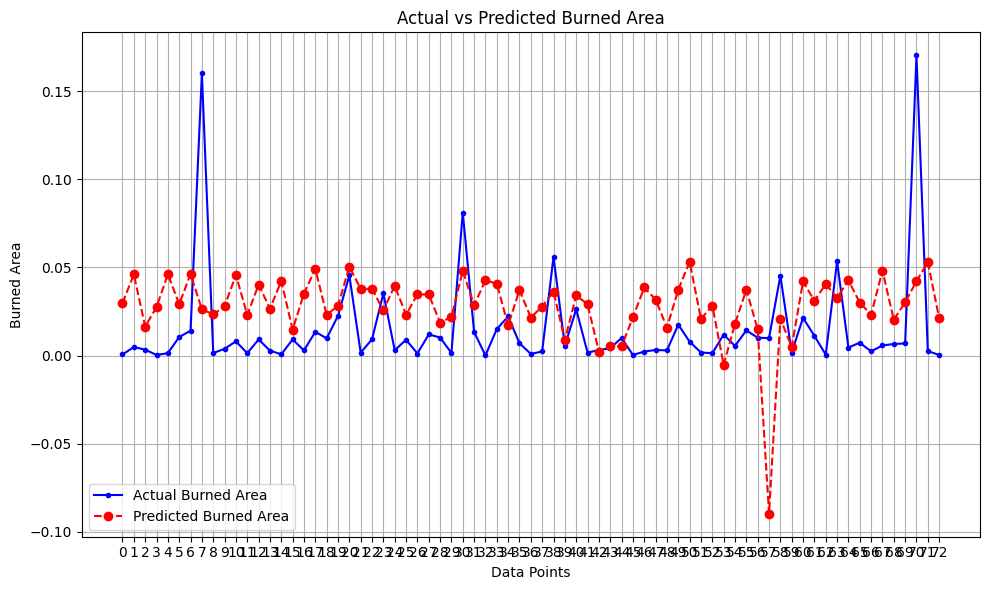

In [78]:
# Plotting actual vs predicted burned area
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['actual_burned_area'], marker='.', linestyle='-', color='b', label='Actual Burned Area')
plt.plot(df.index, df['predicted_burned_area'], marker='o', linestyle='--', color='r', label='Predicted Burned Area')
plt.title('Actual vs Predicted Burned Area')
plt.xlabel('Data Points')
plt.ylabel('Burned Area')
plt.xticks(df.index)
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

#Evaluation

1. the quality of the assessment does not seem to be as high as would be expected. Unfortunately, the trained prediction model seems to follow a rather linear trend, whereas the original data of actual burned area is visibly more seasonal. The intensity of actual area burned also fluctuates steadily and the prediction does not.